In [22]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [23]:
# reading the image
original_img = cv2.imread('/content/LuebeckCityGate.jpg')
original_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)

Text(0.5, 1.0, 'Original Image')

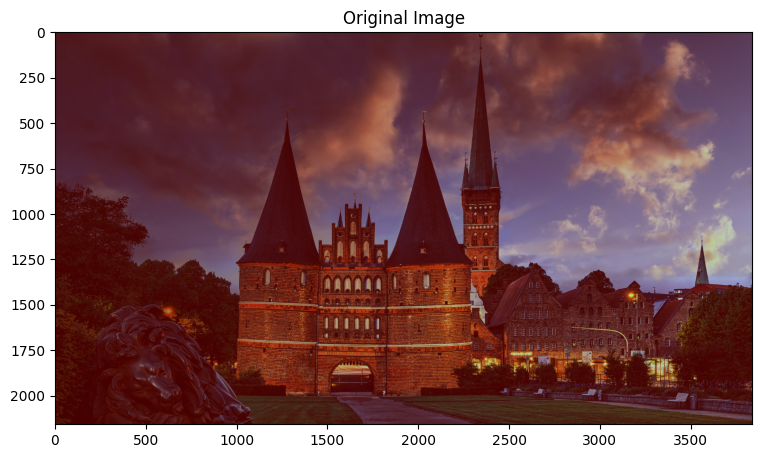

In [24]:
#plotting the Original image
plt.rcParams['figure.figsize'] =(9,6)
plt.imshow(original_img)
plt.title("Original Image")

Text(0.5, 0.98, 'Original Image Histogram(PDF)')

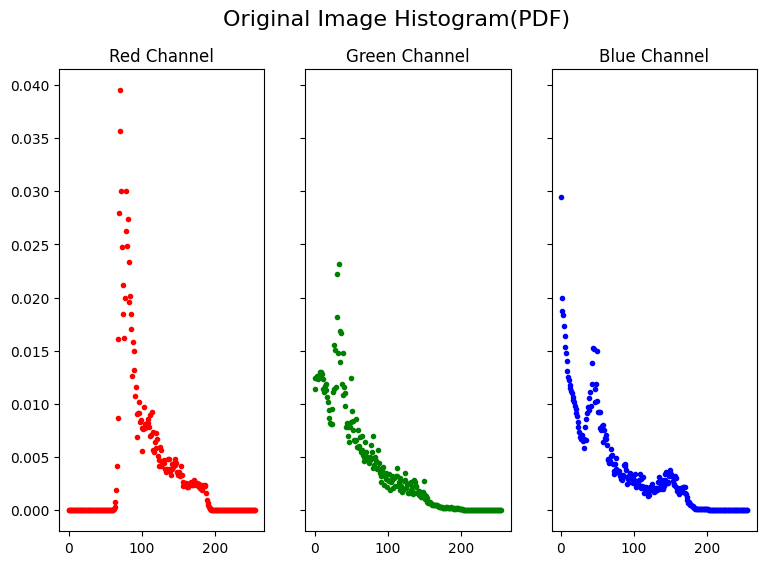

In [25]:
# plotting the Original image histograms
fig, axs = plt.subplots(1, 3,sharey=True)
num_ref = original_img.shape[0] * original_img.shape[1]
axs[0].plot(range(256), cv2.calcHist([original_img],[0],None,[256],[0,256])/num_ref ,'r.')
axs[0].set_title("Red Channel")
axs[1].plot(range(256), cv2.calcHist([original_img],[1],None,[256],[0,256])/num_ref, 'g.')
axs[1].set_title("Green Channel")
axs[2].plot(range(256), cv2.calcHist([original_img],[2],None,[256],[0,256])/num_ref , 'b.')
axs[2].set_title("Blue Channel")
fig.suptitle('Original Image Histogram(PDF)', fontsize=16)

In [26]:
#implemetation of histogram equalization
def histogram_equalization(image):
    result = np.copy(image)
    MN = image.shape[0]*image.shape[1]
    for k in range(image.shape[2]):
        equ_level=np.round(np.cumsum(cv2.calcHist([image],[k],None,[256],[0,256]) / MN )*255 ).astype(np.uint8)
        for i in range(image.shape[0]):
            for j in range(image.shape[1]):
                result[i,j,k] = equ_level[image[i,j,k]] 

    return result


In [27]:
equ_img = histogram_equalization(original_img)

Text(0.5, 1.0, 'Equalized Image')

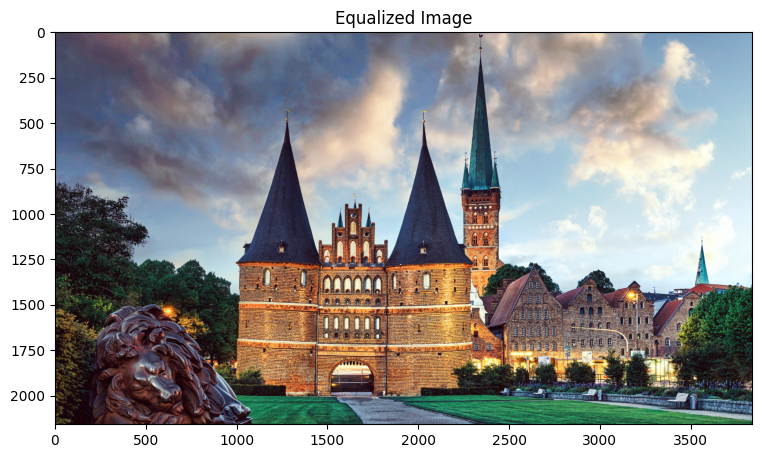

In [28]:
#plotting the  Equalized image
plt.imshow(equ_img)
plt.title("Equalized Image")

In [29]:
#saving the Equalized image
import matplotlib.image as mpimg
mpimg.imsave("result-04.jpg", equ_img)

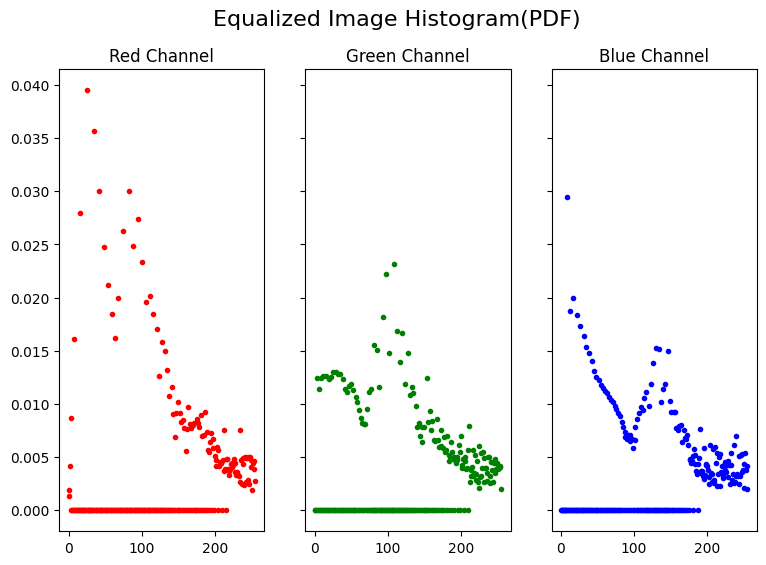

In [30]:
# plotting the Equalized image histograms
fig, axs = plt.subplots(1, 3,sharey=True)
num_ref = equ_img.shape[0] * equ_img.shape[1]
axs[0].plot(range(256), cv2.calcHist([equ_img],[0],None,[256],[0,256])/num_ref ,'r.')
axs[0].set_title("Red Channel")
axs[1].plot(range(256), cv2.calcHist([equ_img],[1],None,[256],[0,256])/num_ref, 'g.')
axs[1].set_title("Green Channel")
axs[2].plot(range(256), cv2.calcHist([equ_img],[2],None,[256],[0,256])/num_ref , 'b.')
axs[2].set_title("Blue Channel")
fig.suptitle('Equalized Image Histogram(PDF)', fontsize=16)
plt.savefig('result-03.jpg')

برای اکوالایز کردن،ابتدا تابع توزیع تجمعی تصویر مورد نظر را به دست میاوریم.سپس مقادیر را با 255 اسکیل کرده و سپس به نزدیک ترین عدد صحیح گرد میکینم.همین کار را برای همه کانال های تصویر رنگی تکرار میکنیم.سپس با استفاده از مقادیری که از این تبدیل برای مقادیر 0تا255 بدست اورده ایم،تک به تک روی پیکسل های تصاویر اعمال میکنیم که در نهایت تصویر اکوالایز شده به دست میاید.